## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## DATA UNDERSTANDING & CLEANING

***Import the necessary libraries***

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import seaborn as sns
#Import Numpy and the Pandas Package
import numpy as np
import pandas as pd
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import StatsModel
import scipy.stats as stats
import statsmodels.api as sm

***Read the kc_house_data.csv***

In [32]:
data = pd.read_csv('C:/Users/user/Documents/PROJECT1/dsc-phase-2-project-v2-3/data/kc_house_data.csv', index_col=0)

# Display the head of the data
print(data.head())

                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors waterfront  view  condition          grade  sqft_above  \
id                                                                          
7129300520     1.0        NaN  NONE    Average      7 Average        1180   
6414100192     2.0         NO  NONE    Average      7 Average        2170   
5631500400     1.0         NO  NONE    Average  6 Low Average         770   
2487200875     1.0         NO  NONE  Very Good      7 

In [33]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [35]:
data.shape

(21597, 20)

 - The data is loaded from a CSV file named "kc_house_data.csv" into a Pandas DataFrame.
 - It has 20 columns with 21597 rows
 - The data contains missing values in the columns : waterfront, view, yr_renovated and zipcode
 - Waterfront, view, and year-renovated are the only columns with missing values
 -The following variables had a strong positive correlation with price: * sqft_living, sqft_above, sqft_living15, and bathrooms
 
 

***Clean the kc_house_data.csv dataset***

In [36]:
# 1. Convert 'date' to a datetime object
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [37]:
# 2. Check for duplicates
duplicates_with_rows = data[data.duplicated()]
duplicates_with_rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [38]:
# 3. Handle missing values in sqft_living to fill missing values with the mean:
data['sqft_living'] = data['sqft_living'].fillna(data['sqft_living'].mean())

In [39]:
data.dropna(inplace = True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15762 non-null  datetime64[ns]
 1   price          15762 non-null  float64       
 2   bedrooms       15762 non-null  int64         
 3   bathrooms      15762 non-null  float64       
 4   sqft_living    15762 non-null  int64         
 5   sqft_lot       15762 non-null  int64         
 6   floors         15762 non-null  float64       
 7   waterfront     15762 non-null  object        
 8   view           15762 non-null  object        
 9   condition      15762 non-null  object        
 10  grade          15762 non-null  object        
 11  sqft_above     15762 non-null  int64         
 12  sqft_basement  15762 non-null  object        
 13  yr_built       15762 non-null  int64         
 14  yr_renovated   15762 non-null  float64       
 15  zipco

 ***How we handled missing values in each column***
 - We found no duplicate rows
 - Then missing values in the column sqft_living were filled with the average value
 - Since the other column didn't have enough data to fill the missing values we dropped those rows

***Read the column_names.md***

In [41]:
with open('C:/Users/user/Documents/PROJECT1/dsc-phase-2-project-v2-3/data/column_names.md', 'r') as file:
    md_lines = file.readlines()

df = pd.DataFrame({'Text': md_lines})

df.head()


,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [42]:
df.shape

(26, 1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


 - The dataset has only one column and 26 rows
 - Each row is aligned to the columns in kc_house_data.csv entailing the column's descriptions 

***Clean the columns_name.md dataset***

In [44]:
df.head()

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [45]:
df[['Column name', 'Descriptions']] = df['Text'].str.split('-', n=1, expand=True)

In [46]:
# Drop the original 'Text' column
df.drop(columns=['Text'], inplace=True)

In [47]:
# Remove rows where 'Descriptions' column contains 'None'
df = df[df['Descriptions'].notna()]

In [48]:
# Remove asterisks from 'Column name' column
df['Column name'] = df['Column name'].str.replace('*', '').str.strip()

# Remove leading and trailing whitespaces from 'Descriptions' column
df['Descriptions'] = df['Descriptions'].str.strip()

In [49]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Column name,Descriptions


In [50]:
df

,Column name,Descriptions
1,`id`,Unique identifier for a house
2,`date`,Date house was sold
3,`price`,Sale price (prediction target)
4,`bedrooms`,Number of bedrooms
5,`bathrooms`,Number of bathrooms
6,`sqft_living`,Square footage of living space in the home
7,`sqft_lot`,Square footage of the lot
8,`floors`,Number of floors (levels) in house
9,`waterfront`,Whether the house is on a waterfront
11,`view`,Quality of view from house


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 25
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column name   21 non-null     object
 1   Descriptions  21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [52]:
df.shape

(21, 2)

 - The dataset had one column that had two columns inside it, so we split each row using dash as the separator (-)
 - Thus we ended up having two columns : Column Names and Descriptions

# Exploratory Data Analysis

## check for outliers

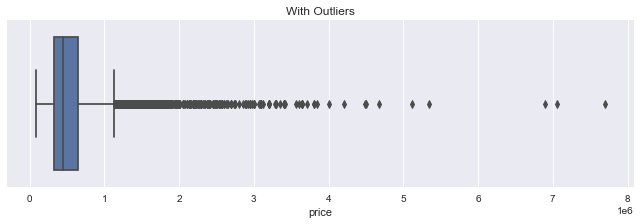

In [53]:
# An outlier is an obervation that lies in an abnormal distance from other values
# Outliers affect the data quality and hence the accuracy of the final model
# Checking for ouutliers is, therefore, vital before proceeding to the next step in the project
# In this case, we check for the outliers using a box plot

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers")

## Deal with Outliers

An outlier is an obervation that lies in an abnormal distance from other values.
Outliers affect the data quality and hence the accuracy of the final model.
You can deal with the outliers by removing them to improve the quality of the model.

In [54]:
#I chose to use Interquartile Range (IRQ) to remove the outliers

Q75 = np.percentile(data['price'],75)
Q25 = np.percentile(data['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

df = data[(data['price']<upper)]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


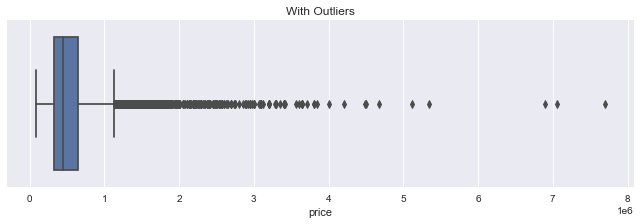

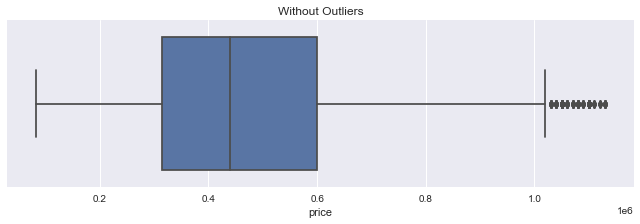

In [55]:
# Let me compare the box plots of with and without outliers
# I will plot a box plot without the outliers
# And from what we can see now, the box plot looks great

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers");
sns.catplot(x='price', data=df, kind='box', height=3, aspect=3).set(title='Without Outliers');

# Checking for Skeweness

Removing outliers is a good way to normalizse the skewness of our graph
We assume that by removing the outliers then the graph will take a shape the look like a normal distribution

4.226727017501067


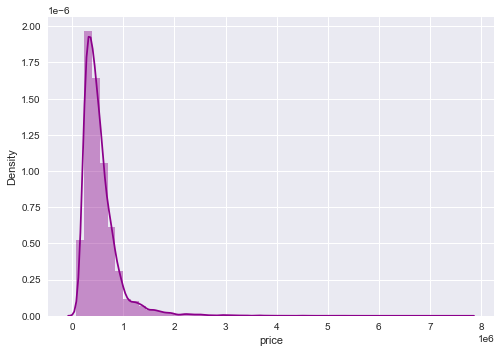

In [56]:
# Let us check the skewness of the graph before removing the outliers

sns.distplot(data.price, color='darkmagenta')
print(data['price'].skew())

0.753349812833949


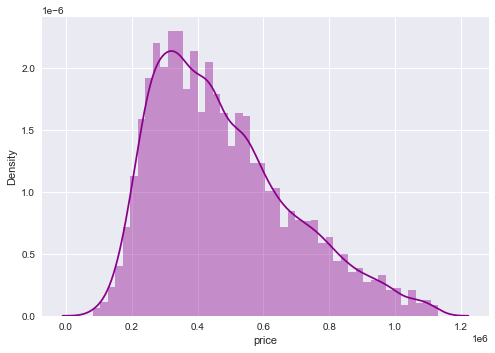

In [57]:
# Now let use see the skewness after dealing with the outliers
# Notice the differences?

sns.distplot(df.price, color='darkmagenta') 

print(df['price'].skew())

## Handling Non-Numeric/Categorical Variables
Non-numeric or categorical data is a great way to understand our data but not the best when it comes to linear regression
Categorical variables will cause problems to the regression model if not transformed further
Some of the categorical data in our dataset include condition, view, waterfront, and grade